# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
def get_reviews(base_url,pages):
    review_list = []

    for i in range(1, pages + 1):

        print(f"Scraping page {i}")

        # Create URL to collect links from paginated data
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

        # Collect HTML data from this page
        response = requests.get(url)

        # Parse content
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        for review in parsed_content.find_all("article", {"itemprop": "review"}):
            key_list = ['Header','Date','Rating','Text']
            value_list = []
            value_list.append(review.find("h2", {"class": "text_header"}).get_text())
            value_list.append(review.find("time", {"itemprop": "datePublished"}).get_text())
            value_list.append(review.find("span", {"itemprop": "ratingValue"}).get_text())
            value_list.append(review.find("div", {"class": "text_content"}).get_text())

            for i in review.find_all("td", {"class": "review-rating-header"} ,limit=5):
                key_list.append(i.get_text())

            for i in review.find_all("td", {"class": "review-value"} ,limit=5):
                value_list.append(i.get_text())

            pop_length = len(set(key_list) - set(['Header', 'Date', 'Rating', 'Text', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown']))
            if(pop_length > 0):
                value_list.pop()
            while pop_length > 0:
                key_list.pop()
                pop_length -= 1

            review_list.append(dict(zip(key_list, value_list)))
    return pd.DataFrame(review_list)


In [3]:
page_size = 100

ba_df = get_reviews('https://www.airlinequality.com/airline-reviews/british-airways',30)
e_df = get_reviews('https://www.airlinequality.com/airline-reviews/emirates',21)
ej_df = get_reviews('https://www.airlinequality.com/airline-reviews/easyjet',11)


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scrapin

In [4]:
display(pd.DataFrame(ba_df))
display(pd.DataFrame(e_df))
display(pd.DataFrame(ej_df))

,Header,Date,Rating,Text,Type Of Traveller,Seat Type,Route,Date Flown,Aircraft
0,“flight was cancelled last minute”,6th December 2024,1,✅ Trip Verified | British Airways is absolute ...,Solo Leisure,Economy Class,London to Amsterdam,December 2024,NaN
1,“Nobody wants to take responsibility”,2nd December 2024,1,✅ Trip Verified | The flight time was changed ...,Solo Leisure,Economy Class,Marrakesh to London,August 2024,A320
2,"""Terrible customer service""",29th November 2024,1,✅ Trip Verified | I'm so fraustrated. My fli...,Family Leisure,Economy Class,London Heathrow to Toronto,November 2024,NaN
3,“Is British Airways really this cheap”,23rd November 2024,1,✅ Trip Verified | We have sat on this plane fo...,Solo Leisure,Economy Class,Milan Italy to London Heathrow,November 2024,NaN
4,"""I will never fly BA again""",18th November 2024,1,Not Verified | British Airways stranding my w...,Family Leisure,Economy Class,Madrid to San Diego via London,October 2024,NaN
...,...,...,...,...,...,...,...,...,...
2995,British Airways customer review,12th August 2015,1,Travelled on August 8th when there was a power...,Family Leisure,Economy Class,Hyderabad to Phoenix via LHR,August 2015,Boeing 747
2996,British Airways customer review,11th August 2015,7,Flying out on Sunday received call from BA say...,Couple Leisure,Business Class,Washington Dulles to Heathrow,August 2015,Boeing 777
2997,British Airways customer review,11th August 2015,1,"Where shall I start, 4 hours delay or the days...",Couple Leisure,Business Class,London to Nassau,August 2015,Boeing 767
2998,British Airways customer review,11th August 2015,9,This was my first time on a long haul flight w...,Couple Leisure,Economy Class,Dublin to Vancouver via London Heathrow,August 2015,NaN


,Header,Date,Rating,Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown
0,"""declining year over year""",2nd December 2024,1,Not Verified | Worst experience I had with Em...,Boeing 777-300ER,Family Leisure,Economy Class,Washington to Hyderabad via Dubai,February 2024
1,"""main issue is around meals""",1st December 2024,4,✅ Trip Verified | Travelled home on Emirates...,A380,Couple Leisure,Economy Class,Bangkok to Manchester via Dubai,November 2024
2,“cabin crew appeared rather lacklustre”,1st December 2024,6,✅ Trip Verified | Travelled from Manchester to...,A380,Couple Leisure,Economy Class,Manchester to Kuala Lumpur via Dubai,November 2024
3,“it was not worth the cost”,1st December 2024,7,✅ Trip Verified | Given all the hype about the...,A380,Family Leisure,First Class,Singapore to Munich via Dubai,July 2024
4,"""share my negative experience""",27th November 2024,1,Not Verified | I would like to share my negati...,NaN,Couple Leisure,Economy Class,Tunis to Shanghai via Dubai,December 2023
...,...,...,...,...,...,...,...,...,...
2095,Emirates customer review,18th August 2014,7,RUH-DXB-MRU arrived a few hours ago. EK818 I l...,NaN,NaN,Business Class,NaN,NaN
2096,Emirates customer review,18th August 2014,10,AMS-DXB-SYD. Both legs on A380 booked business...,NaN,NaN,Business Class,NaN,NaN
2097,Emirates customer review,18th August 2014,6,ADL to DXB. Slow boarding and no separate line...,NaN,NaN,Business Class,NaN,NaN
2098,Emirates customer review,18th August 2014,10,MEL-CPH B777-200ER return and had a great expe...,NaN,NaN,Business Class,NaN,NaN


,Header,Date,Rating,Text,Type Of Traveller,Seat Type,Route,Date Flown,Aircraft
0,"""left my mobile in the seat pocket""",3rd December 2024,1,Not Verified | I flew from Belfast city to Ga...,Solo Leisure,Economy Class,Belfast to Gatwick,December 2024,NaN
1,"""Great flight on Easyjet""",7th November 2024,10,✅ Trip Verified | Flew Amsterdam to Belfast ...,Solo Leisure,Economy Class,Amsterdam to Belfast,November 2024,A319
2,“incredibly disappointing and frustrating”,31st October 2024,1,✅ Trip Verified | Recent experience with Eas...,Family Leisure,Economy Class,Gatwick to Malaga,October 2024,NaN
3,"""a very bad experience""",29th October 2024,1,✅ Trip Verified | I have had a very bad expe...,Solo Leisure,Economy Class,Malaga to Athens,October 2024,NaN
4,“planes were clean and comfortable”,27th October 2024,6,✅ Trip Verified | My first time flying easyJet...,Couple Leisure,Economy Class,London to Catania,October 2024,A320
...,...,...,...,...,...,...,...,...,...
1095,easyJet customer review,27th July 2015,4,I haven't flown with this airline for 8 years....,Family Leisure,Economy Class,Bristol to Corfu,July 2015,NaN
1096,easyJet customer review,26th July 2015,9,"Good flight both ways, checked in online using...",Family Leisure,Economy Class,Liverpool to Faro,June 2015,NaN
1097,easyJet customer review,26th July 2015,9,"CPH-BRS. Bag drop at Copenhagen T2 was fast, a...",Couple Leisure,Economy Class,CPH to BRS,July 2015,A320
1098,easyJet customer review,26th July 2015,8,They had the new thinner seats on this flight ...,Business,Economy Class,Krakow to Edinburgh,July 2015,A320


## Pre Processing

In [5]:
from typing import Union, List
import re
import string

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

In [6]:
df1 = ba_df.copy()
df2 = e_df.copy()
df3 = ej_df.copy()

In [7]:
def clean_df(df):
    df["Text"] = df["Text"].str.replace(r"✅|Trip Verified \||Verified Review \||Unverified \||Not Verified \||/|'","",regex=True).str.strip()
    df["Text"] = df["Text"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
    return df

df1 = clean_df(df1)
df2 = clean_df(df2)
df3 = clean_df(df3)

## Sentiment Analysis

In [8]:
import pandas as pd
import nltk
from textblob import TextBlob
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
import torch
print(torch.version.cuda)  # Check CUDA version
print(torch.cuda.is_available())  # Should return True if GPU is available


12.1
True


In [10]:
def find_sentiment(df):
    sentiment_analyzer = pipeline("sentiment-analysis", truncation=True, model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", top_k=None, device=0)
    sentiment_prediction = sentiment_analyzer(df['Text'].to_list())

    sentiment_predictions = pd.DataFrame([
        {item['label']: item['score'] for item in sublist}  # Convert each sublist into a dictionary
        for sublist in sentiment_prediction  # Iterate over the outer list
    ])
    sentiment_df = pd.concat([df,sentiment_predictions],axis=1)
    sentiment_df['Sentiment'] = sentiment_df[['NEGATIVE','POSITIVE']].apply(lambda row: row.idxmax() if row.max() > 0.7 else 'NEUTRAL', axis=1)
    return sentiment_df

In [11]:
df1 = find_sentiment(df1)
df2 = find_sentiment(df2)
df3 = find_sentiment(df3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## QA


In [12]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
model_name = "deepset/roberta-base-squad2"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def find_theme(df):
    df['QA_question'] = ['What is the customer happy about?' if row.Sentiment == 'POSITIVE' else 'What is the customer unhappy about?' for i,row in df.iterrows()]
    df['QA_question'] = ['What is the customer talking about?' if row.Sentiment == 'NEUTRAL' else row.QA_question for i,row in df.iterrows()]

    nlp = pipeline('question-answering', model=model_name, tokenizer=model_name, top_k=None, device=0)
    res = nlp(question=df['QA_question'].to_list(),context=df['Text'].to_list())
    df['QA_answer'] = pd.DataFrame(res).answer.values

    return df

df1 = find_theme(df1)
df2 = find_theme(df2)
df3 = find_theme(df3)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

### Aspect based Sentiment Analysis

In [13]:
candidate_labels = ['food', 'service', 'comfort', 'staff', 'seat', 'baggage', 'cancellation', 'ticket']

def find_aspect(df):
    classifier = pipeline('zero-shot-classification', truncation=True, model='facebook/bart-large-mnli', top_k=None, device=0)
    res = classifier(df['Text'].to_list(), candidate_labels, multi_label=True)

    rows = []
    for entry in res:
        row = dict(zip(entry['labels'], entry['scores']))
        rows.append(row)

    rows = pd.DataFrame(rows)
    df = pd.concat([df,rows], axis=1)

    return df

In [14]:
df1 = find_aspect(df1)
df2 = find_aspect(df2)
df3 = find_aspect(df3)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Summary


In [15]:
# Initialize a summarization pipeline
def find_summary(df):
  summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", truncation=True, top_k=None,device=0)
  summary = summarizer(df['Text'].to_list(), max_length=30, min_length=5, do_sample=False)
  df = pd.concat([df,pd.DataFrame(summary)], axis=1)
  return df

df1 = find_summary(df1)
df2 = find_summary(df2)
df3 = find_summary(df3)

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 30, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 30, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 30, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


In [29]:
df1.to_csv('ba.csv')
df2.to_csv('e.csv')
df3.to_csv('ej.csv')

In [28]:
# Clean Header
df1["Header"] = df1["Header"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
df2["Header"] = df2["Header"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
df3["Header"] = df3["Header"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

## Word Cloud

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def show_wordcloud(df):
    text = " ".join(df['Text'])

    # Create a WordCloud object
    wordcloud = WordCloud(
        width=800,       # Width of the canvas
        height=400,      # Height of the canvas
        background_color='white',  # Background color
        colormap='viridis',        # Color map
        max_words=100              # Maximum number of words
    ).generate(text)  # Generate word cloud from the text

    vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')  # Generate bigrams and trigrams
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    frequencies = X.toarray().sum(axis=0)

    # Step 3: Create a dictionary of n-grams and their frequencies
    phrase_freq = dict(zip(ngrams, frequencies))

    # Step 4: Generate the Phrase Cloud
    phrase_cloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(phrase_freq)

    # Step 5: Display the Phrase Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(phrase_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth edges
    plt.axis('off')  # Turn off axes
    plt.show()


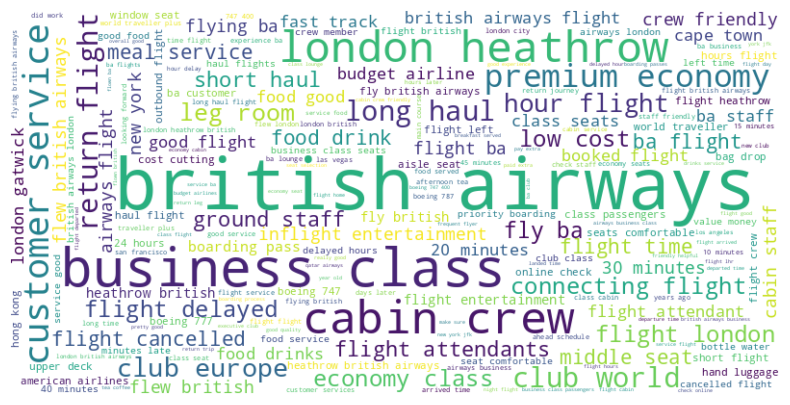

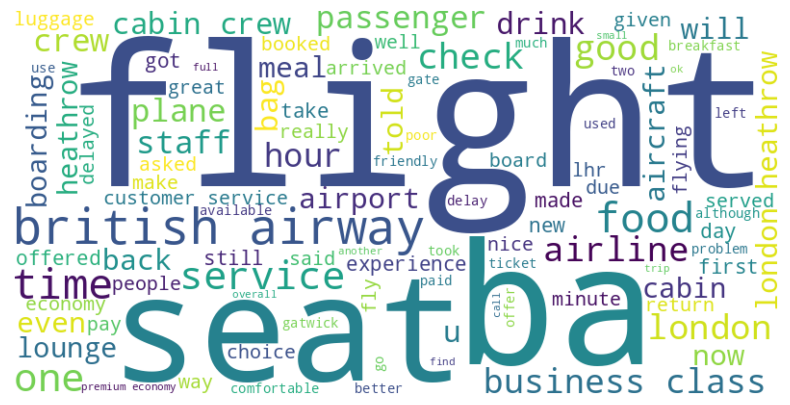

In [22]:
show_wordcloud(df1)

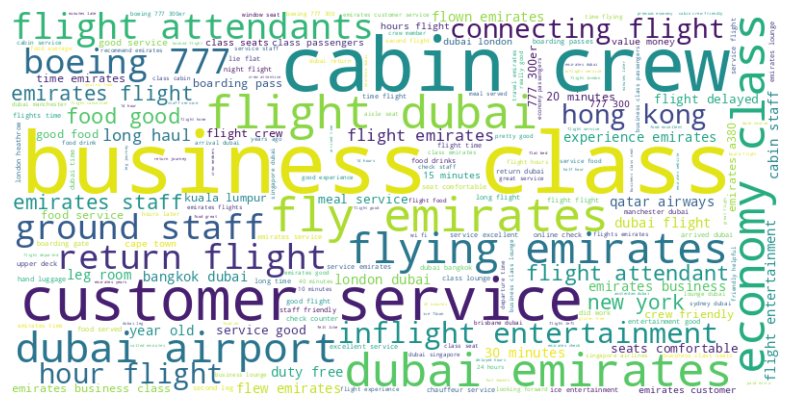

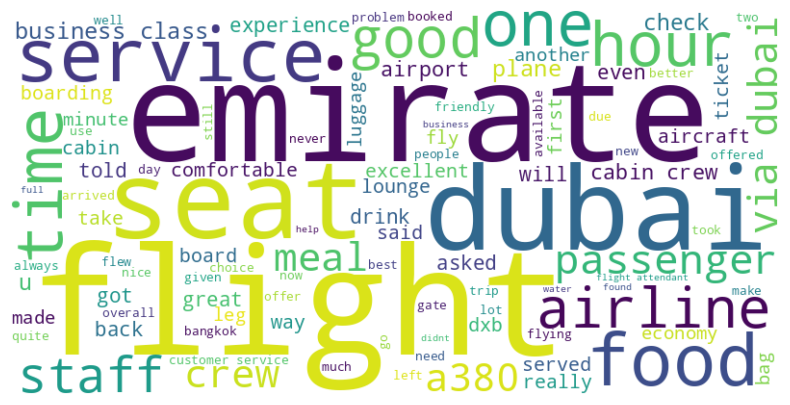

In [23]:
show_wordcloud(df2)

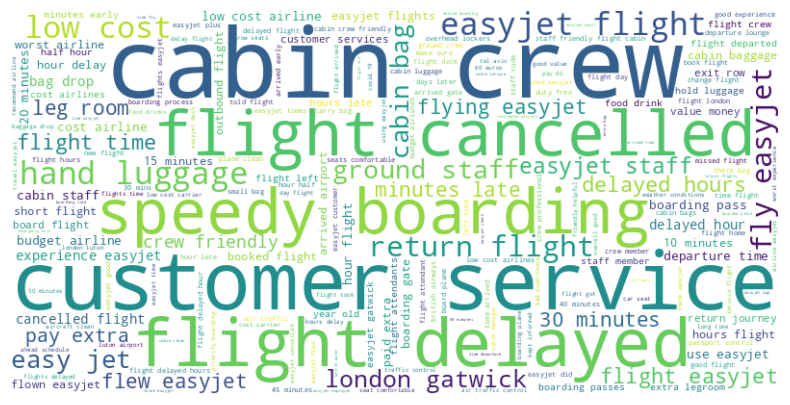

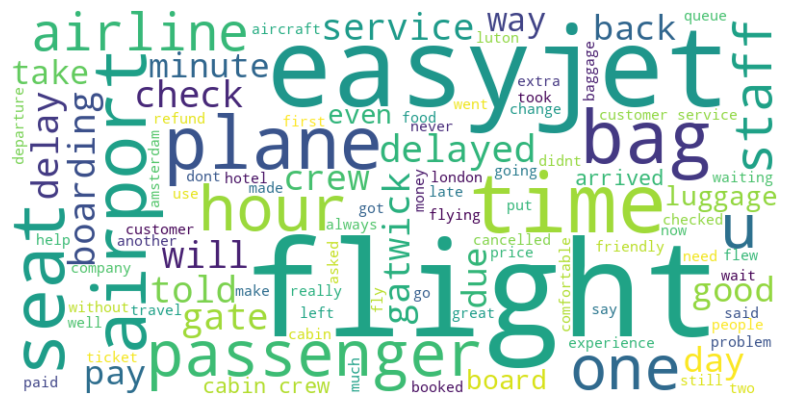

In [24]:
show_wordcloud(df3)